# Machine learning and statistics Assessment 2020


In [1]:
import scipy.stats
import numpy as np # Numerical arrays
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Plotting library
from scipy.stats import chi2_contingency
import sklearn.cluster as skcl # Machine learning
from sklearn import datasets # So we can load the Iris dataset

### 1. Python function to calculate square root of 2 to 100 decimal places

Our assignment here is to write a python function, called sqrt2, that calculates and prints the square root of 2 to 100 decimal places. This has to be done without using any modules.
The square root of 2 is an irrational number, which means it cannot be written as a fraction and there will never be any pattern in the number.

First I tried the easiest method I could think of, which was:

In [2]:
def sqrt2practice():
    x = 2 ** 0.5
    print(x)
    
sqrt2practice()

1.4142135623730951


Unfortunately, Python only calculated 16 decimal places. This is because Python only stores an approximation of irrational numbers, so as to make it too heavy to calculate with. Let's try to get python to print out 100 decimals using the format() function.

In [3]:
def sqrt2practice2():
    x = 2 ** 0.5
    print("{:.100f}".format(x))
    
sqrt2practice2()

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


Well, we got a bit further, 51 decimals this time. But then python is just showing us a bunch of zeros. 
We know that the square root of 2 is an irrational number, which never can be represented exactly by a finite number of digits,  so chances of this being correct are extremely small. Also, I checked what the correct value should be and I found this: 

1.41421356237309504880168872420969807856967187537694 80731766797379907324784621070388503875343276415727 
https://nerdparadise.com/math/reference/2sqrt10000 and https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil

So, it seems we haven't gotten much closer to what we are looking for. This simple formula is not going to do, time to really delve into the subject and find a solution.

#### Newton's Method

When trying to find a manual way of calculating the square root, I came across Newton's method.
Basically, what this method does, is take an original guess at the square root, and then with a simple formula, get closer and closer, until the difference between the last and the second last guess is adequately small.


In [4]:
# Return square root of 2, using Newton's approach  
def squareRoot() : 

    x = 2 # Initial guess 
    
    l = 0.000001 # Required difference between last and second last guess
    
    
    while True : # Keep going until condition becomes false
         
  
        root = 0.5 * (x + (2 / x)) # Get closer and closer to the correct number, by perfecting the initial guess, with this simple formula   

  
        if (abs(root - x) < l) : # If difference between root and x(last and second last guess) is smaller than l, break the loop. Use abs to convert negative int to positive
            break 
  
        x = root # last guess becomes root  
        
    s = format(root, ".100f") # Show 100 decimals
        
    return s 
  

    print(squareRoot())

    # Adapted from: https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/

In [5]:
squareRoot()

'1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000'

Newton's method works, but still, Python won't calculate the square root of 2 to 100 digits.

After spending hours trying to figure out a way, I found something promising on stackoverflow. What if we try to find the square root of 2 * 10 * 200 (to leave 101 digits), and then format it in a way that gets rid of the superfluous zero's at the end and displays it in the right way? Got some inspiration here: https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra and here:
https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

In [6]:
# code adapted from https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

def sqrt2(): # Function that calculates the squareroot of 2, to a total of 100 digits. Keeping numbers as integers.
    
    a = 2 * (10**(2*100)) # to calculate 
    
    x_prev = 0 # Set initial guess at 0
    
    x_next = 1 * (10**100)
    
    while x_prev != x_next: # Keep going until x_prev == x_next
        
        x_prev = x_next # previous x is replaced by next x
        
        x_next = (x_prev + (a // x_prev)) >> 1 # Use a method like Newtons to get closer and closer to the correct number
        
    sqrt2=str(x_next) # Change x_next into a string so it can be used into format properly
    
    print('{}.{}'.format(sqrt2[:1], sqrt2[1:101])) # Format so the first digit comes before the '.' and the next 100 digits come after.




In [7]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


Now, lets compare this value to the number found on Nerdparadise, as well as on the official NASA website:

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

It looks like we finally got to where we wanted to be!

### 2. Chi-squared test

A Chi-squared test tells us if there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table. https://en.wikipedia.org/wiki/Chi-squared_test 

First, I need to create a Pandas DataFrame from the table, so I can perform the Chi-squared test on it. I got some help on how to create a DataFrame and how to rename the rows here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [8]:
df = pd.DataFrame(np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]]), columns=["A", "B", "C", "D"])
df.rename(index={0: "White collar", 1: "Blue collar", 2: "No collar"})


,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No collar,30,40,45,35


In [9]:
chi2, p, dof, expected = chi2_contingency(df) # Learned how to do this here: https://stackoverflow.com/questions/43963606/python-pandas-chi-squared-test-of-independence

In [10]:
chi2 # Display Chi-squared value

24.5712028585826

In [11]:
p # Display the associated p-value

0.0004098425861096696

In [12]:
dof # display the degrees of freedom

6

In [13]:
expected # Display the expected values if neighbourhood of residence is independent of occupation.

array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]])

With a p-value of 0.0004 it is extremely unlikely that random chance can explain the observed values.

## 3. Standard deviation (STDEV.P vs STDEV.S)

Microsoft Excel has two different ways of calculating the standard deviation of an array of numbers. STDEV.P and STDEV.S. What is the difference?
It turns out STDEV.P is equal to Numpy's std() function, while STDEV.S can be calculated using Numpy, by adding *ddot = 1*. 
I will explain what this means and the difference between the two methods in more detail below, and give some examples.

In [14]:
x = np.arange(30) # Create an array with 30 values, 0 to 30
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

First, I will use Numpy to calculate the standard deviation of my array, without subtracting 1 from len. So this method is similar to STDEV.P function in Excel. I am not specifying any ddof (Delta Degrees of Freedom), so this is set to it's default of 0. The formula numpy is using to calculate the standard deviation of x is: *np.sqrt(np.sum((x - np.mean(x))**2)/len(x))*

In [15]:
np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) # Making sure result is the same as the np.std function

8.65544144839919

In [16]:
np.std(x) # Same result, so will be using this function from now on.

8.65544144839919

Now, we know the standard deviation of the population. Let's take a sample and see if and how the samples' standard deviation differs.

In [17]:
xsample = np.random.choice(x,6, replace=False) # Take a sampe of 6 numbers from the population x, without replacement, so no value can be selected twice.

In [18]:
xsample

array([ 1,  5, 17, 26, 18, 24])

In [19]:
np.std(xsample)

9.227073690444273

The standard deviation of the sample is lower than the one from the entire population. How can this be?

I found this explanation on Stackoverflow: 
*In the calculation of the variance (of which the standard deviation is the square root) we typically divide by the number of values we have.
But if we select a random sample of N elements from a larger distribution and calculate the variance, division by N can lead to an underestimate of the actual variance. To fix this, we can lower the number we divide by (the degrees of freedom) to a number less than N (usually N-1). The ddof parameter allows us to change the divisor by the amount we specify. https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std

So, to get rid of this bias (or at least part of it) we lower the number we divide by (degrees of freedom) to some number less than len(x). The ddof value specifies how much you want to subtract from len(x). Typically, a value of ddof = 1 is used, and this is identical to what Excel does in it's STDEV.S function. 



Now, I will add 'ddof = 1'. By doing so, 1 will be subtracted from the number of elements to be divided by, and the possible  bias (typically an underestimation) will be lowered  https://numpy.org/doc/stable/reference/generated/numpy.std.html

This is identical to the STDEV.S function in Excel, and calculates an estimate of the whole population's standard deviation from the sample.

In [20]:
np.std(xsample, ddof=1)

10.107752800037536

This estimate, based on the sample, is a lot closer to the actual population's standard deviation.
The reason STDEV.S (or adding ddof = 1 in numpy) is better at estimating the standard deviation of a population, when performed on a sample, is because division by len(x) can lead to an underestimate of the variance. https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std

The result of STDEV.S is always higher than that of STDEV.P, because STDEV.S removes one value of len(x). This is typically a good thing when trying to estimate the standard deviation of a population from the standard deviation of a sample, as the samples' is typically underestimated.

Let's try this again on a bigger population and sample.

In [21]:
y = np.arange(150) # Create an array with 150 values, 0 to 150
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [22]:
np.std(y)

43.300307928081374

In [23]:
ysample = np.random.choice(y,30, replace=False) # Take a sample of 30, without replacement, from y

In [24]:
np.std(ysample)

38.23238882878698

In [25]:
np.std(ysample, ddof=1) # Closer to standard deviation of population

38.885981281560646

After generating **y and ysample** a number of times, I noticed the correction that is made by adding **ddof=1** is smaller in a bigger sample. This is a good thing, because generally a smaller correction is needed in a bigger sample.

As can be seen, the method of using len(x)-1 works well in small and large samples alike, because the larger the sample, the closer the sample's variance will match the population's variance, and less compensation is needed. https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

So to conclude: the STDEV.S function gives a better estimation of the standard deviation of a population, when estimating it using the standard deviation of sample, than STDEV.P. This is because, STDEV.S lowers the number we divide by to len(x)-1, and this lowers the (underestimate) bias that typically occurs when estimating the populations standard deviation from that of sample.

## 4. Using scikit-learn on Iris data set


In this fourth and final task I will be looking closely at the famous Iris data set and 

First, let's have a quick look at the dataset to remind ourselves what it was about:

In [26]:
iris = pd.read_excel("irisdata.xls", usecols=(0,1,2,3))
print (iris) # Use Pandas to show Iris data set 

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


The Iris dataset consists of 150 samples, 50 of each species of Iris flower. There are four features by which the species might by distinguished. 

To use kmeans on this dataset, I have only selected the columns which contain numerical data. 
Now I am going to apply K-means clustering to this data set. Clustering is a learning method that allows us to group a set of objects based on similar characteristics. 

In [27]:
%matplotlib inline 
# Magic matplotlib function that renders figure in jupyter notebook

In [30]:
iris = datasets.load_iris() # Load the dataset

In [31]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

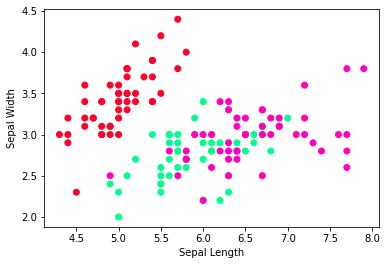

In [35]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

https://web.microsoftstream.com/video/0685eed2-2dd6-490b-b6fc-cda8391f1db7?referrer=https:%2F%2Flearnonline.gmit.ie%2F K-Means clustering

MAKE SURE USE OF BOLD AND ITALIC IS CONSISTENT, ADD PROPER LINKS AND README